<a href="https://colab.research.google.com/github/victorusacgt/2.Regresion-Polinomial/blob/master/Tarea_2_Parte_1_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive 
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Usando feature-eng para crear un modelo exponencial de Covid-19

**Content**

Each row contains report from each region/location for each day
Each column represents the number of cases reported from each country/region


**Acknowledgements**

https://github.com/CSSEGISandData/COVID-19


In [8]:
covid19_data = pd.read_csv('/content/gdrive/My Drive/statistical_learning1/assets/covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [9]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

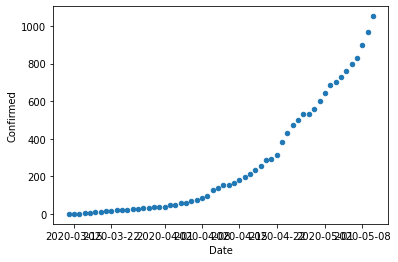

In [10]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

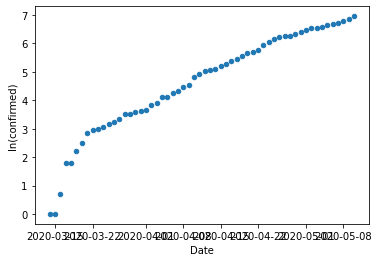

In [11]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")


In [12]:
GT_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed)
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0.000000
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,0.000000
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,0.693147
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,1.791759
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,1.791759
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,2.197225
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,2.484907
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,2.833213
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732


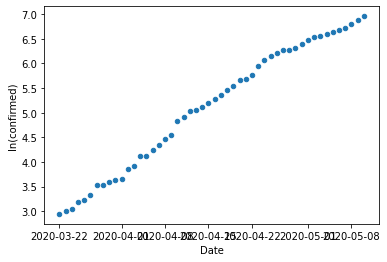

In [13]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(confirmed)")

In [17]:
GT_confirmed_post24_sort = GT_confirmed_post24.sort_values(by = ["Date"])
GT_confirmed_post24_sort

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed)
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732
16491,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522
16755,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054
17019,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876
17283,NaN,Guatemala,15.7835,-90.2308,2020-03-27,28,1,4,3.332205
17547,NaN,Guatemala,15.7835,-90.2308,2020-03-28,34,1,10,3.526361
17811,NaN,Guatemala,15.7835,-90.2308,2020-03-29,34,1,10,3.526361
18075,NaN,Guatemala,15.7835,-90.2308,2020-03-30,36,1,10,3.583519
18339,NaN,Guatemala,15.7835,-90.2308,2020-03-31,38,1,12,3.637586


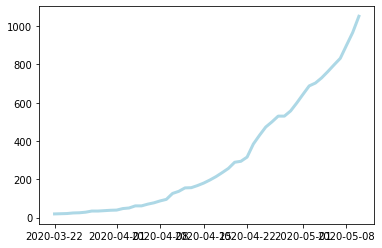

In [19]:
plt.plot(GT_confirmed_post24_sort["Date"], GT_confirmed_post24_sort["Confirmed"], color='lightblue', linewidth=3)
plt.show()

In [21]:
GT_confirmed_post24_sort["Date"] = GT_confirmed_post24_sort["Date"]-np.min(GT_confirmed_post24_sort["Date"])
GT_confirmed_post24_sort["Date"]

15963    0 days
16227    1 days
16491    2 days
16755    3 days
17019    4 days
17283    5 days
17547    6 days
17811    7 days
18075    8 days
18339    9 days
18603   10 days
18867   11 days
19131   12 days
19395   13 days
19659   14 days
19923   15 days
20187   16 days
20451   17 days
20715   18 days
20979   19 days
21243   20 days
21507   21 days
21771   22 days
22035   23 days
22299   24 days
22563   25 days
22827   26 days
23091   27 days
23355   28 days
23619   29 days
23883   30 days
24147   31 days
24411   32 days
24675   33 days
24939   34 days
25203   35 days
25467   36 days
25731   37 days
25995   38 days
26259   39 days
26523   40 days
26787   41 days
27051   42 days
27315   43 days
27579   44 days
27843   45 days
28107   46 days
28371   47 days
28635   48 days
28899   49 days
Name: Date, dtype: timedelta64[ns]

In [22]:
GT_confirmed_post24_sort

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed)
15963,NaN,Guatemala,15.7835,-90.2308,0 days,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,1 days,20,1,0,2.995732
16491,NaN,Guatemala,15.7835,-90.2308,2 days,21,1,0,3.044522
16755,NaN,Guatemala,15.7835,-90.2308,3 days,24,1,4,3.178054
17019,NaN,Guatemala,15.7835,-90.2308,4 days,25,1,4,3.218876
17283,NaN,Guatemala,15.7835,-90.2308,5 days,28,1,4,3.332205
17547,NaN,Guatemala,15.7835,-90.2308,6 days,34,1,10,3.526361
17811,NaN,Guatemala,15.7835,-90.2308,7 days,34,1,10,3.526361
18075,NaN,Guatemala,15.7835,-90.2308,8 days,36,1,10,3.583519
18339,NaN,Guatemala,15.7835,-90.2308,9 days,38,1,12,3.637586


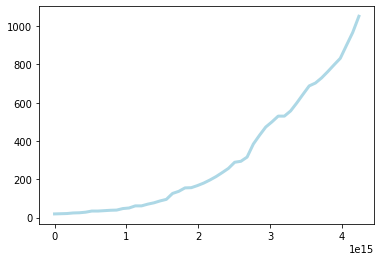

In [31]:
plt.plot(GT_confirmed_post24_sort["Date"], GT_confirmed_post24_sort["Confirmed"], color='lightblue', linewidth=3)
plt.show()